In [1]:
import requests
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
COUNTRY_DATA = {
        "USA": "United States",
        "ESP": "Spain",
        "HUN": "Hungary",
        "MAR": "Morocco",
        "CHL": "Chile",
        "HRV": "Croatia",
        "JPN": "Japan",
        "FIN": "Finland",
        "DEU": "Germany",
        "NZL": "New Zealand",
        "JOR": "Jordan",
        "ZAF" : "South Africa"
        # Add more countries as needed
    }

ADV_COUNTRIES  = [
        "USA",
        "ESP",
        "JPN",
        "FIN",
        "DEU",
        "NZL",
    ]

EMER_COUNTRIES = [
    "MAR",
    "CHL",
    "JOR",
    "ZAF",
    "HUN",
    "HRV",
]

INDICATORS = {
    "Population": "LP",
    "current account balance": "BCA_NGDPD",
    #"General government total expenditure": "GGX_NGDP",
    "General government net lending/borrowing": "GGXCNL_NGDP",
    #"General government structural balance": "GGXONLB_NGDP",
    #"General Government Revenue": "GGR_NGDP",
    "General government gross debt": "GGXWDG_NGDP",
    "Unemployment rate": "LUR",
    "GDP per Capita": "NGDPDPC",
    "Government revenue (% of GDP)": "rev",
    "Government expenditure (% of GDP)": "exp",
    "Gross public debt": "d",
    "Real GDP growth rate": "rgc",
    #"Export Quality Index": "SITC1_total",
    "Household Debt": "HH_ALL",
    #"Public Sector Debt (% of GDP)": "PS_DEBT_GDP",
    #"Trade balance (% of GDP)": "BT_GDP",
    #"Gross national savings (% of GDP)": "NGS_GDP"
    #"Gross national savings": "NGSD_NGDP",
    #"Total investment": "NID_NGDP"
}
TIME_SPAN = list(range(2018, 2023+1)) 

BASE_URL = "https://www.imf.org/external/datamapper/api/v1/"


In [3]:
def parseData(rawData):
    countries = []
    years = []
    values = []
    for country in data.keys():
        country_data = data[country]
        countries += [country]*len(country_data)
        years += country_data.keys()
        values += country_data.values()
        
    dfSource = {
        "Country": countries,
        "Year": years,
        indicator_id: values,
    }
    return pd.DataFrame(dfSource)

In [4]:
def mergeDFs(main_df, new_df):
    if main_df is None:
        return new_df
    else:
        return pd.merge(main_df, new_df, on=["Country","Year"], how="outer")

In [5]:
country_codes = "/".join(COUNTRY_DATA.keys())
periods = ",".join((str(y) for y in TIME_SPAN))

In [6]:
main_df = None
for indicator_name, indicator_id in INDICATORS.items():
    #for year in [2018]: #TIME_SPAN:
    #url = f"{base_url}/{indicator_id}/{country_code}?periods={year}"
    url = f"{BASE_URL}/{indicator_id}/{country_codes}?periods={periods}"
    print(url)
    #try:
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()["values"][indicator_id]
        indicator_df = parseData(data)
        main_df = mergeDFs(main_df, indicator_df)
    else:
        print(response.status_code)
       

https://www.imf.org/external/datamapper/api/v1//LP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//BCA_NGDPD/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//GGXCNL_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//GGXWDG_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//LUR/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//NGDPDPC/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//rev/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://w

In [7]:
#main data indicators data frame 
main_df
#advanced countries data frame
advanced_df = main_df.loc[main_df["Country"].isin(ADV_COUNTRIES)]
advanced_df.reset_index(drop = True, inplace = True)
#emerging countries data frame
emerging_df = main_df.loc[main_df["Country"].isin(EMER_COUNTRIES)]
emerging_df.reset_index(drop = True, inplace = True)


In [8]:
#pulling specific columns
selected_adv_df = pd.DataFrame()
selected_emer_df = pd.DataFrame()
selected_adv_df = advanced_df.iloc[:,[0, 1, 11]]
selected_emer_df = emerging_df.iloc[:,[0, 1, 11]] #select which indicator via the column number starting at 0 for Country
selected_emer_df

,Country,Year,rgc
0,CHL,2018,3.990029
1,CHL,2019,0.743130
2,CHL,2020,-6.145247
3,CHL,2021,11.737431
4,CHL,2022,2.440403
5,CHL,2023,NaN
6,HRV,2018,2.799159
7,HRV,2019,3.420060
8,HRV,2020,-8.530496
9,HRV,2021,13.086290


In [9]:
#code to do a scatter plots
# countries_colors = {
#         'United States' :'red',
#         'Spain' : 'blue',
#         "Hungary" : "yellow",
#         "Morocco" : "green",
#         "Chile" : "black",
#         "Croatia" : "orange",
#         "Japan" : "violet",
#         "Finland" : "brown",
#         "Germany" : "magenta",
#         "New Zealand" : "coral",
#         "Jordan" : "sea green",
#         "South Africa" : "teal"
# }

for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.scatter(selected_emer_df['Year'], selected_emer_df['d'], label=country, s=15)

plt.xlabel('Year')
plt.ylabel('LP')
plt.title('Scatter Plot for LP Over Time by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

KeyError: 'd'

In [10]:
#selected_df = pd.DataFrame()
#selected_df = main_df.iloc[:,[0,1,2]]
#selected_df_columns= selected_df.columns()
#advanced_df = selected_df["Country"].isin(ADV_COUNTRIES)
#.filter(ADV_COUNTRIES, axis = selected_df_columns)
#emerging_df = selected_df.filter(EMER_COUNTRIES, axis = selected_df_columns)
#main_df.dropna()
#selected_data = "Year","LP"
#main_df[selected_data]
#clean_data = main_df[[selected_data]].dropna()
#main_df["LP"]
#stupid_df = pd.DataFrame()
#stupid_df["Year","LP"].dropna()


# for country in selected_df["Country"]:
#     for country in COUNTRY_DATA.keys():
#         if country

#sub_df = pd.DataFrame.loc(main_df["Year"])
#sub_df.columns("Year","Population")

In [11]:
# # Group by Country and calculate the sum of debt for each year
# debt_by_year = main_df.groupby('Year')['d'].sum()
# # Filter the DataFrame to include only rows where the indicator is 'Gross public debt'
# debt_df = main_df[main_df['d'] == 'd']

# # Plotting the national debt for each country over the years
# plt.figure(figsize=(12, 8))

# for country in ADV_COUNTRIES:
#     country_data = debt_df[debt_df['Country'] == country]
#     plt.plot(country_data['Year'], country_data['d'], label=COUNTRY_DATA[country])

# plt.title('Gross Public Debt Over Time for Advanced Countries')
# plt.xlabel('Year')
# plt.ylabel('Gross Public Debt (% of GDP)')
# plt.legend()
# plt.grid(True)
# plt.show()


In [12]:
#debt_by_year = main_df.groupby('Year')['d'].sum()
#print(debt_by_year)

In [13]:
# # Calculate the year-to-year percentage change in debt
# debt_by_year_change = debt_by_year.pct_change() * 100

# # Plotting the percentage change in national debt over time
# plt.figure(figsize=(10, 6))
# plt.bar(debt_by_year_change.index, debt_by_year_change.values, color='orange')
# plt.title('Year-to-Year Percentage Change in National Debt')
# plt.xlabel('Year')
# plt.ylabel('Percentage Change')
# plt.grid(True)
# plt.show()

# plt.scatter(x = <df name>.df["Year"], y = <df name>["LP"], s = 20, c=  <df name>["Country"].cmap(countries_colors))
# plt.scatter(<df name>["Year"], <df name>["LP"])
# plt.show()


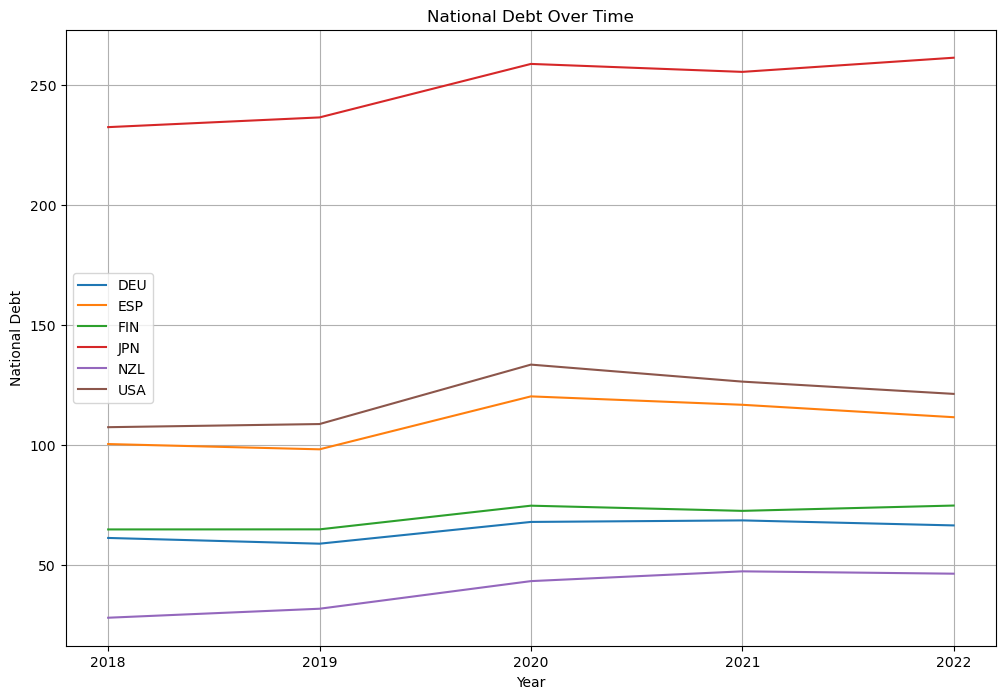

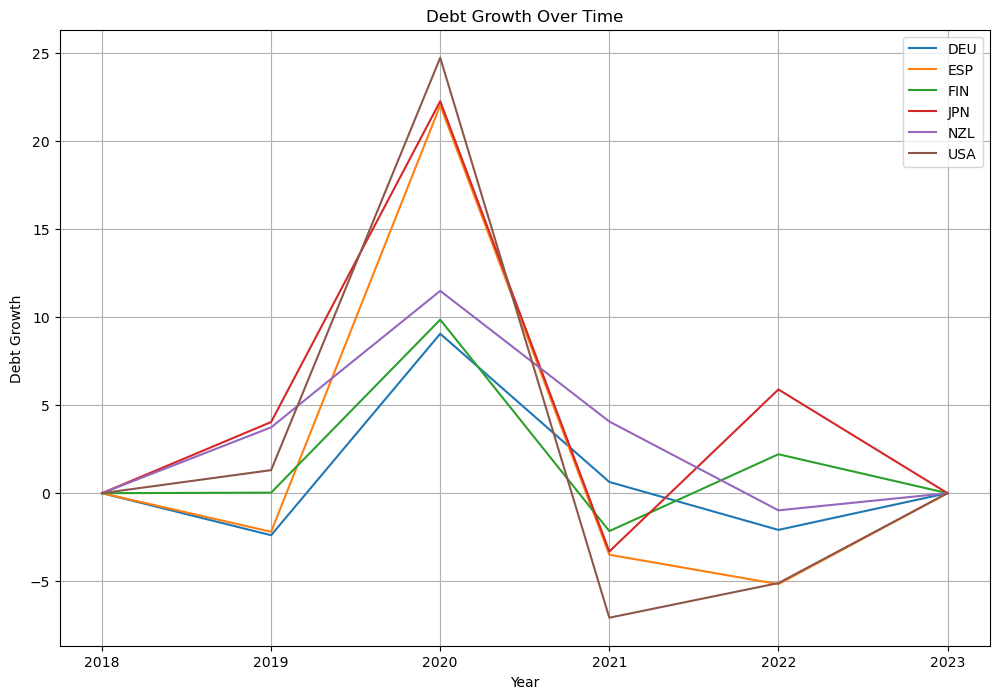

In [19]:

# Assuming 'selected_adv_df' is your DataFrame with the provided data
# Replace 'NaN' values with 0 for plotting
main_df['d'].fillna(0, inplace=True)

# Plotting the national debt for each advanced  country over the years
plt.figure(figsize=(12, 8))

for country in selected_adv_df['Country'].unique():
    country_data = selected_adv_df[selected_adv_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['d'], label=country)

plt.title('National Debt Over Time')
plt.xlabel('Year')
plt.ylabel('National Debt')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing trends of debt growth
#The diff() method returns a DataFrame with the difference between the values for each row and, by default, the previous row.
debt_growth = selected_adv_df.groupby('Country')['d'].diff().fillna(0)

plt.figure(figsize=(12, 8))
for country in selected_adv_df['Country'].unique():
    country_data = selected_adv_df[selected_adv_df['Country'] == country]
    plt.plot(country_data['Year'], debt_growth[country_data.index], label=country)

plt.title('Debt Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Growth')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Descriptive statistics
debt_stats = selected_adv_df.groupby('Country')['d'].describe()
print(debt_stats)

         count        mean        std         min         25%         50%  \
Country                                                                     
DEU        5.0   64.677237   4.311222   58.925563   61.316347   66.535292   
ESP        5.0  109.453111   9.783192   98.221004  100.415481  111.595826   
FIN        5.0   70.382057   5.103476   64.862672   64.892433   72.595390   
JPN        5.0  248.841684  13.416720  232.386265  236.430710  255.394024   
NZL        5.0   39.423555   8.860780   28.097108   31.839261   43.337944   
USA        5.0  119.480498  11.270678  107.437512  108.746590  121.306431   

                75%         max  
Country                          
DEU       67.986011   68.622975  
ESP      116.767508  120.265734  
FIN       74.752641   74.807149  
JPN      258.708613  261.288810  
NZL       46.433864   47.409599  
USA      126.416415  133.495543  


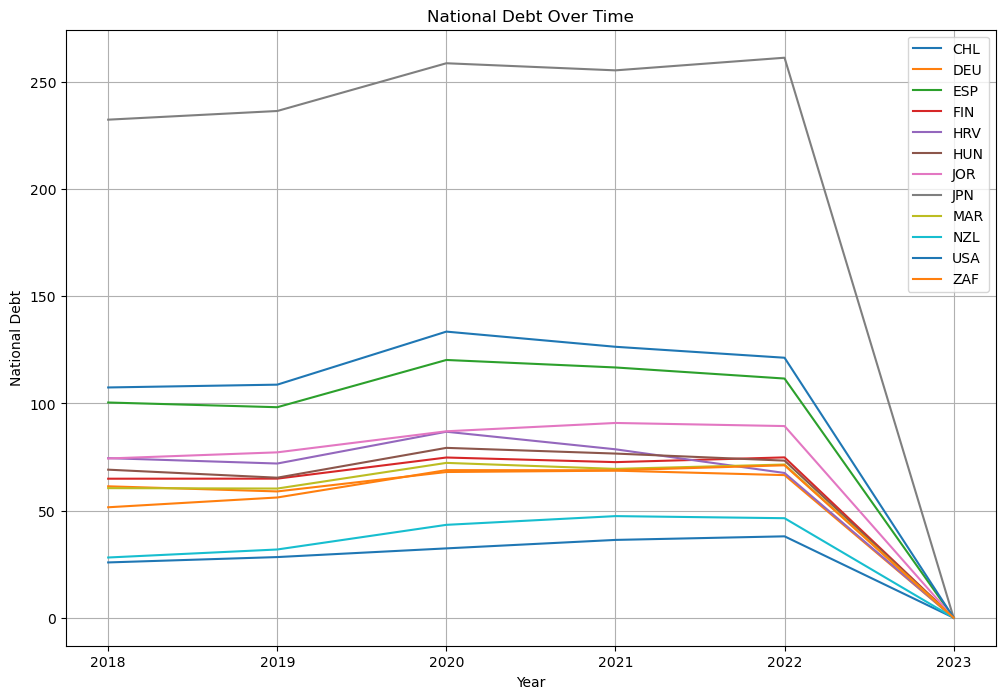

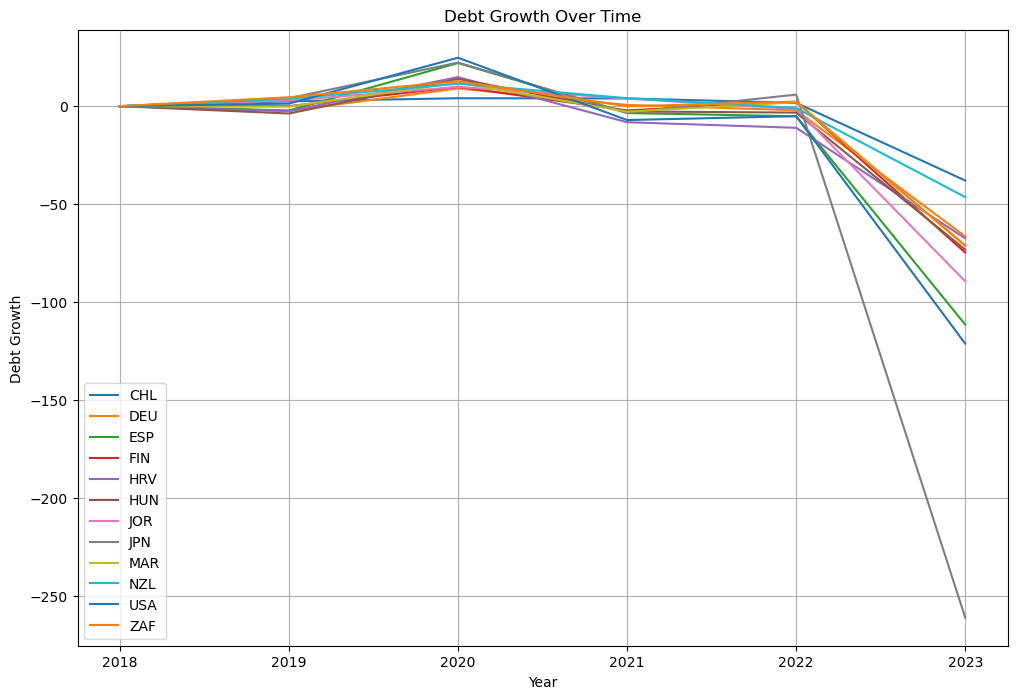

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'main_df' is your DataFrame with the provided data
# Replace 'NaN' values with 0 for plotting
main_df['d'].fillna(0, inplace=True)

# Plotting the national debt for each country over the years
plt.figure(figsize=(12, 8))

for country in main_df['Country'].unique():
    country_data = main_df[main_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['d'], label=country)

plt.title('National Debt Over Time')
plt.xlabel('Year')
plt.ylabel('National Debt')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing trends of debt growth
debt_growth = main_df.groupby('Country')['d'].diff().fillna(0)

plt.figure(figsize=(12, 8))
for country in main_df['Country'].unique():
    country_data =main_df[main_df['Country'] == country]
    plt.plot(country_data['Year'], debt_growth[country_data.index], label=country)

plt.title('Debt Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Growth')
plt.legend()
plt.grid(True)
plt.show()


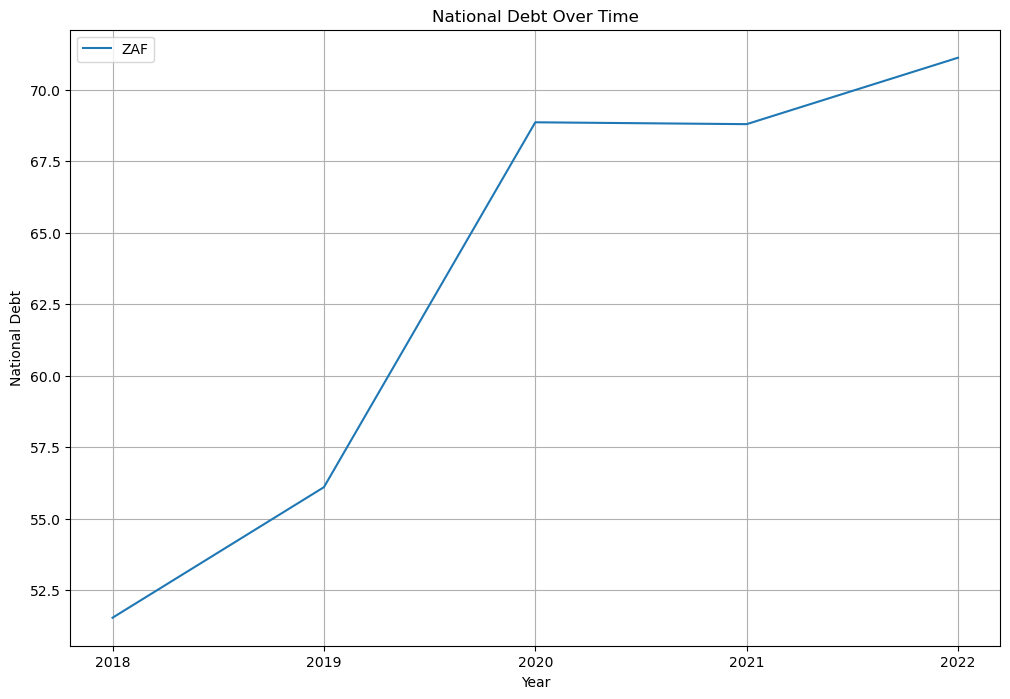

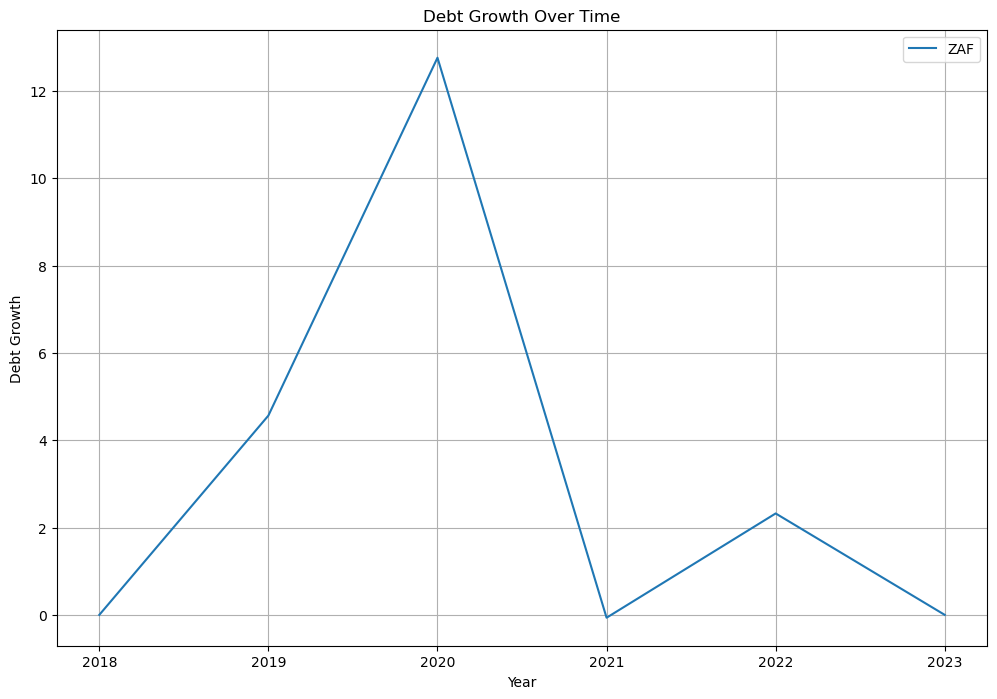

In [22]:

# Assuming 'selected_emer_df' is your DataFrame with the provided data
# Create a copy to avoid SettingWithCopyWarning
#selected_emer_df_copy = selected_emer_df.copy()
# Replace 'NaN' values with 0 for plotting
main_df['d'].fillna(0, inplace=True)

# Plotting the national debt for each country over the years
plt.figure(figsize=(12, 8))

for country in selected_emer_df['Country'].unique():
    country_data = selected_emer_df[selected_emer_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['d'], label=country)

plt.title('National Debt Over Time')
plt.xlabel('Year')
plt.ylabel('National Debt')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing trends of debt growth
debt_growth = selected_emer_df.groupby('Country')['d'].diff().fillna(0)

plt.figure(figsize=(12, 8))
for country in selected_emer_df['Country'].unique():
    country_data = selected_emer_df[selected_emer_df['Country'] == country]
    plt.plot(country_data['Year'], debt_growth[country_data.index], label=country)

plt.title('Debt Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Growth')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Descriptive statistics
debt_stats = selected_emer_df.groupby('Country')['d'].describe()
print(debt_stats)

         count       mean       std        min        25%        50%  \
Country                                                                
ZAF        5.0  63.283658  8.839288  51.536269  56.101331  68.797459   

               75%        max  
Country                        
ZAF      68.862534  71.120698  


In [1]:
# Assuming 'selected_emer_df' is your DataFrame with the provided data
# Create a copy to avoid SettingWithCopyWarning
selected_emer_df_copy = selected_emer_df.copy()
# Replace 'NaN' values with 0 for plotting
selected_emer_df_copy['d'].fillna(0, inplace=True)

# Plotting the national debt for each country over the years
plt.figure(figsize=(12, 8))

for country in selected_emer_df_copy['Country'].unique():
    country_data = selected_emer_df_copy[selected_emer_df_copy['Country'] == country]
    plt.plot(country_data['Year'], country_data['d'], label=country)

plt.title('National Debt Over Time')
plt.xlabel('Year')
plt.ylabel('National Debt')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing trends of debt growth
debt_growth = selected_emer_df_copy.groupby('Country')['d'].diff().fillna(0)

plt.figure(figsize=(12, 8))
for country in selected_emer_df_copy['Country'].unique():
    country_data = selected_emer_df_copy[selected_emer_df_copy['Country'] == country]
    plt.plot(country_data['Year'], debt_growth[country_data.index], label=country)

plt.title('Debt Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Growth')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'selected_emer_df' is not defined

# Revenue Analysis

In [15]:
#pulling specific columns from both data frames
selected_adv_df = pd.DataFrame()
selected_emer_df = pd.DataFrame()
selected_adv_df = advanced_df.iloc[:,[0, 1, 2, 3, 7,8,9,11]]
selected_emer_df = emerging_df.iloc[:,[0, 1, 2,3,7,8,9,11]] #select which indicator via the column number starting at 0 for Country


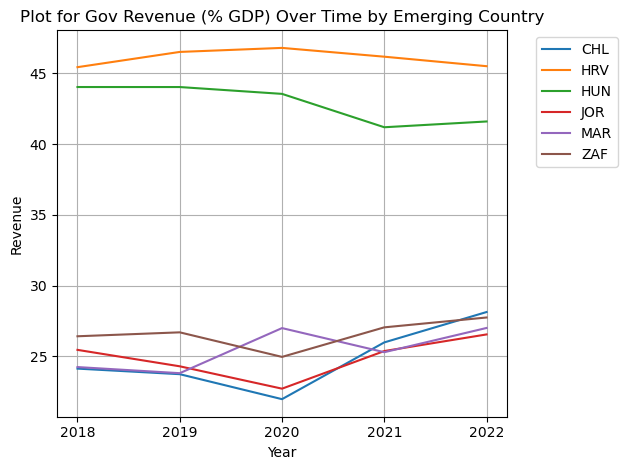

In [81]:
#Data Visualization

#Revenue Graphic
#plot1 = plt.subplot2grid((3,3),(2,2))
#plot2 = plt.subplot2grid((3,3),(1,1))
for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.plot(selected_emer_df['Year'], selected_emer_df['rev'], label=country)

plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Plot for Gov Revenue (% GDP) Over Time by Emerging Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.savefig("Revenue(%GDP)_EmergingCountries")

plt.tight_layout()
plt.show()

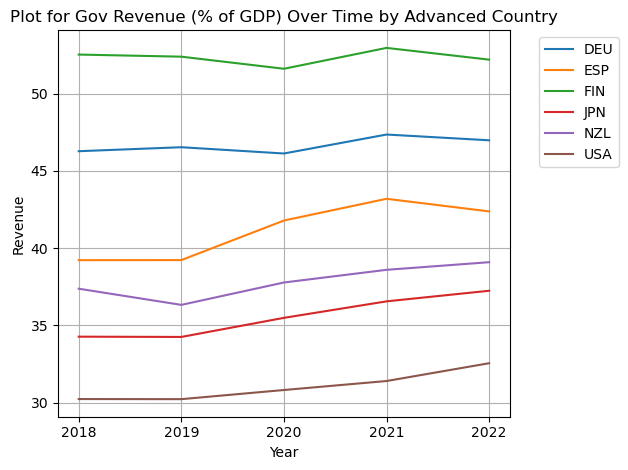

In [83]:
for country, selected_adv_df in selected_adv_df.groupby('Country'):
    plt.plot(selected_adv_df['Year'], selected_adv_df['rev'], label=country)
    
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Plot for Gov Revenue (% of GDP) Over Time by Advanced Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("Revenue(%GDP)_AdvancedCountries")

plt.tight_layout()
plt.show()

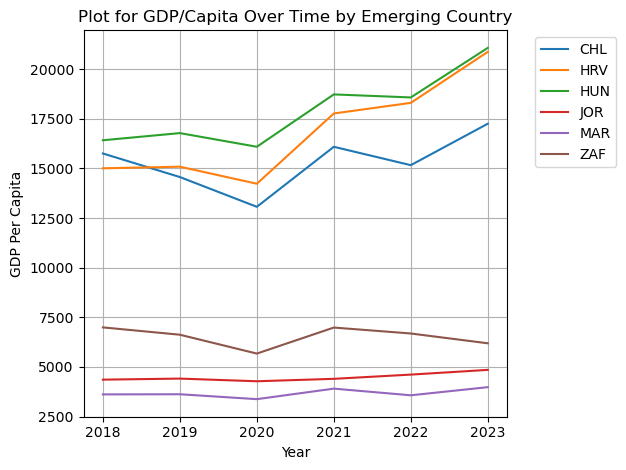

In [94]:
#GDP/Capita

#Emerging Countries
for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.plot(selected_emer_df['Year'], selected_emer_df['NGDPDPC'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Plot for GDP/Capita Over Time by Emerging Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("GDPperCapita_EmergingCountries")

plt.tight_layout()
plt.show()

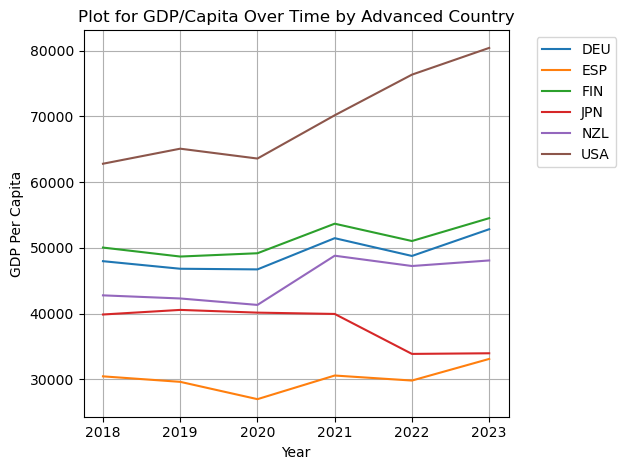

In [96]:
#Advanced Countries
for country, selected_adv_df in selected_adv_df.groupby('Country'):
    plt.plot(selected_adv_df['Year'], selected_adv_df['NGDPDPC'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Plot for GDP/Capita Over Time by Advanced Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("GDPperCapita_AdvancedCountries")

plt.tight_layout()
plt.show()

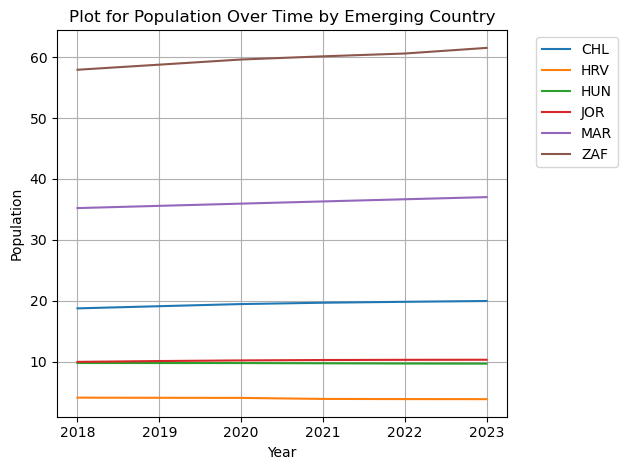

In [90]:
#Why the sudden jump in Morocco's government revenue (% of GDP)?

#Let's examine the population changes in the emerging countries
for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.plot(selected_emer_df['Year'], selected_emer_df['LP'], label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Plot for Population Over Time by Emerging Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("Population_EmergingCountries")

plt.tight_layout()
plt.show()

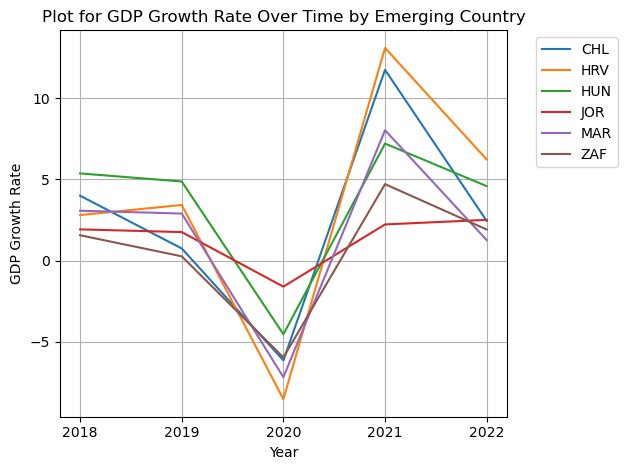

In [92]:
#Let's examine the GDP growth of Morocco
for country, selected_emer_df in selected_emer_df.groupby('Country'):
    plt.plot(selected_emer_df['Year'], selected_emer_df['rgc'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')
plt.title('Plot for GDP Growth Rate Over Time by Emerging Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("GDPGrowthRate_EmergingCountries")

plt.tight_layout()
plt.show()

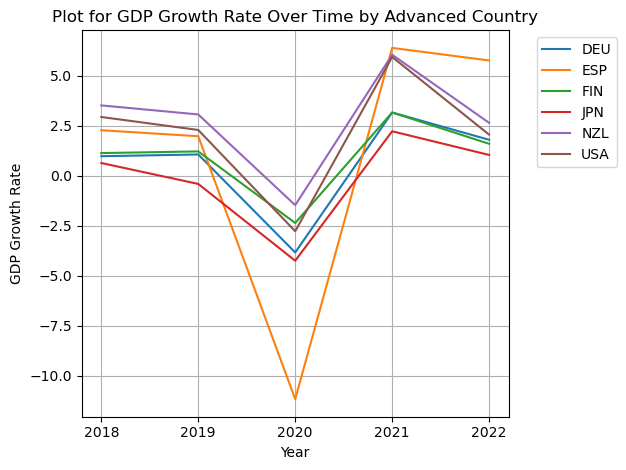

In [16]:

for country, selected_adv_df in selected_adv_df.groupby('Country'):
    plt.plot(selected_adv_df['Year'], selected_adv_df['rgc'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')
plt.title('Plot for GDP Growth Rate Over Time by Advanced Country')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("GDPGrowthRate_AdvancedCountries")

plt.tight_layout()
plt.show()